## IMPORTING DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk as nltk
from wordcloud import WordCloud

In [2]:
file_path="C:/Users/ThiernoIbrahimaDiall/OneDrive - Data ScienceTech Institute/Python project/Project 2/asap-aes/training_set_rel3.tsv"

In [3]:
file_path

'C:/Users/ThiernoIbrahimaDiall/OneDrive - Data ScienceTech Institute/Python project/Project 2/asap-aes/training_set_rel3.tsv'

In [4]:
df=pd.read_csv(file_path,sep='\t',encoding='ISO-8859-1')

In [5]:
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1',
       'rater3_domain1', 'domain1_score', 'rater1_domain2', 'rater2_domain2',
       'domain2_score', 'rater1_trait1', 'rater1_trait2', 'rater1_trait3',
       'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait1',
       'rater2_trait2', 'rater2_trait3', 'rater2_trait4', 'rater2_trait5',
       'rater2_trait6', 'rater3_trait1', 'rater3_trait2', 'rater3_trait3',
       'rater3_trait4', 'rater3_trait5', 'rater3_trait6'],
      dtype='object')

In [7]:
df.shape

(12976, 28)

In [8]:
training_set=df['essay']

In [9]:
training_set

0        Dear local newspaper, I think effects computer...
1        Dear @CAPS1 @CAPS2, I believe that using compu...
2        Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...
3        Dear Local Newspaper, @CAPS1 I have found that...
4        Dear @LOCATION1, I know having computers has a...
                               ...                        
12971     In most stories mothers and daughters are eit...
12972     I never understood the meaning laughter is th...
12973    When you laugh, is @CAPS5 out of habit, or is ...
12974                                   Trippin' on fen...
12975     Many people believe that laughter can improve...
Name: essay, Length: 12976, dtype: object

## EDA's steps

# # Visualize the distribution of text lengths

C:\Users\ThiernoIbrahimaDiall\AppData\Local\Temp\ipykernel_2228\3601230715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_set['text_length'] =training_set.apply(len)


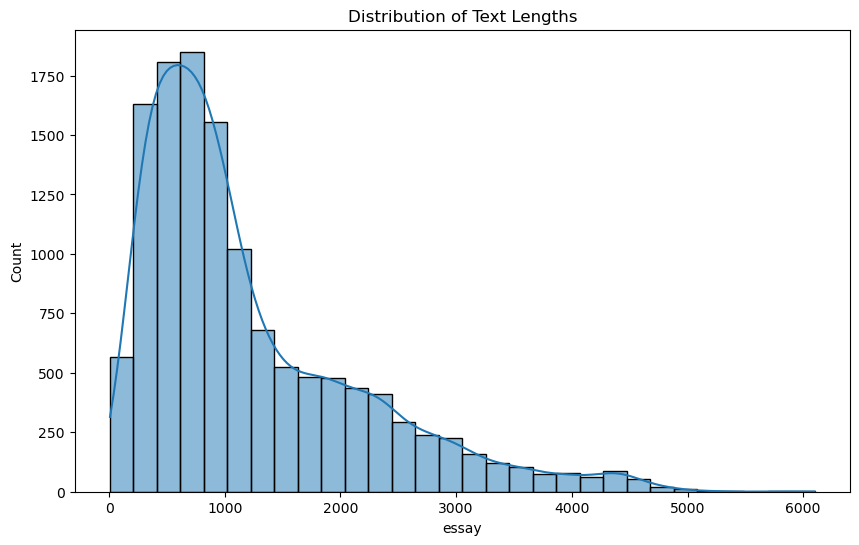

In [10]:
training_set['text_length'] =training_set.apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(training_set['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.show()

## Word count in each row

In [11]:
training_set['word_count'] = training_set.apply(lambda x: len(str(x).split()))
print(training_set)

0              Dear local newspaper, I think effects computer...
1              Dear @CAPS1 @CAPS2, I believe that using compu...
2              Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...
3              Dear Local Newspaper, @CAPS1 I have found that...
4              Dear @LOCATION1, I know having computers has a...
                                     ...                        
12973          When you laugh, is @CAPS5 out of habit, or is ...
12974                                         Trippin' on fen...
12975           Many people believe that laughter can improve...
text_length    0        1875
1        2288
2        1541
3   ...
word_count     0              338
1              419
2       ...
Name: essay, Length: 12978, dtype: object


In [12]:
training_set['word_count']

0              338
1              419
2              279
3              524
4              465
              ... 
12972          546
12973          817
12974          562
12975          467
text_length     27
Name: essay, Length: 12977, dtype: int64

In [12]:
df_words=training_set['word_count']

# #Most frequent words using WordCloud

In [13]:
# Concatenate all the text from the 'text_column'

all_text = ' '.join(df['essay'].astype(str))


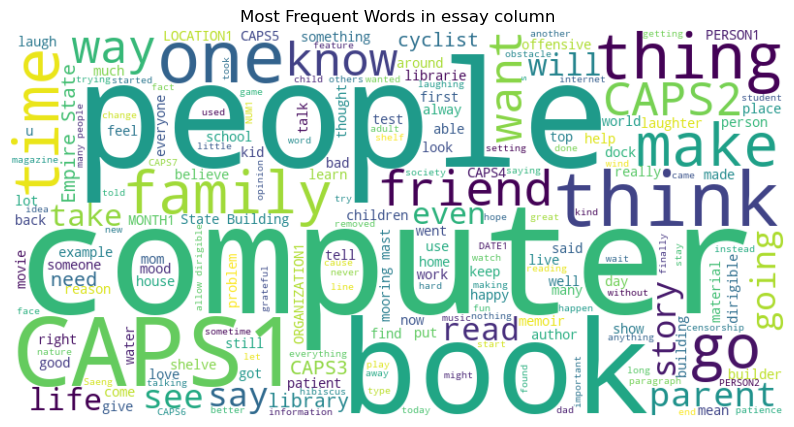

In [14]:
# Most frequent words using WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(all_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in essay column')
plt.show()

## counting unique word and adjectifs

In [15]:
import spacy
from collections import Counter

# Load spaCy English language model
nlp = spacy.load("en_core_web_sm")


# Function to calculate unique word count
def calculate_unique_word_count(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Calculate unique words
    unique_words = set(token.text.lower() for token in doc if token.is_alpha)

    return len(unique_words)

# Function to count adjectives
def count_adjectives(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Count occurrences of adjectives
    adjectives = [token.text.lower() for token in doc if token.pos_ == "ADJ"]
    adjective_counts = Counter(adjectives)

    return adjective_counts

# Apply the functions to each row in the DataFrame
df['unique_word_count'] = df['essay'].apply(calculate_unique_word_count)
df['adjective_counts'] = df['essay'].apply(count_adjectives)

# Display the DataFrame with calculated metrics
print(df['unique_word_count'])


0        157
1        186
2        140
3        224
4        194
        ... 
12971    299
12972    192
12973    337
12974    225
12975    216
Name: unique_word_count, Length: 12976, dtype: int64


In [19]:
df['adjective_counts']

0        {'dear': 1, 'local': 2, 'great': 2, 'new': 4, ...
1        {'many': 5, 'able': 1, '@num1': 2, 'less': 1, ...
2        {'dear': 1, 'more': 3, 'positive': 1, 'differe...
3        {'many': 1, 'true': 1, 'most': 4, 'close': 1, ...
4        {'dear': 1, 'positive': 1, 'great': 1, '@num1'...
                               ...                        
12971    {'most': 1, 'high': 1, 'current': 1, 'differen...
12972    {'shortest': 1, '@num1': 1, 'puppy': 1, 'real'...
12973    {'sure': 1, 'technical': 1, 'true': 1, 'funny'...
12974    {'@num1': 2, 'young': 1, 'short': 1, 'stupid':...
12975    {'many': 1, 'daily': 1, 'better': 1, 'happy': ...
Name: adjective_counts, Length: 12976, dtype: object

In [20]:
df['total_adjectives'] = df['adjective_counts'].apply(lambda d: sum(d.values()))

In [21]:
df['total_adjectives']

0        18
1        22
2        19
3        40
4        30
         ..
12971    43
12972    38
12973    39
12974    43
12975    39
Name: total_adjectives, Length: 12976, dtype: int64

In [22]:
print(df['unique_word_count'])

0        157
1        186
2        140
3        224
4        194
        ... 
12971    299
12972    192
12973    337
12974    225
12975    216
Name: unique_word_count, Length: 12976, dtype: int64


## counting the number of @ referenced in each cell 

In [22]:

# Function to count "@" occurrences in a cell
def count_at_mentions(cell_text):
    return cell_text.count('@')

# Apply the function to each row in the DataFrame
df['at_mentions_count'] = df['essay'].apply(count_at_mentions)

# Display the DataFrame with the count of "@" mentions
print(df['at_mentions_count'])

0         5
1        10
2         7
3        41
4         4
         ..
12971    55
12972    32
12973    57
12974    20
12975    11
Name: at_mentions_count, Length: 12976, dtype: int64


In [23]:
df['at_mentions_count']

0         5
1        10
2         7
3        41
4         4
         ..
12971    55
12972    32
12973    57
12974    20
12975    11
Name: at_mentions_count, Length: 12976, dtype: int64

## Feature Engineering

## Let's add these columns :
    .#total_words
    .#total_Unique_Words
    .#Total_Adjectif
    .#total_Reference
 ## Based on these columns, we wil determine a general logic in order to add the last column which will help us calssify the test between: Excellent, Good, Fair and  Bad

In [24]:
# Création des DataFrames supplémentaires

df1=df['essay']
df2=df_words
df3=df['unique_word_count']
df4=df['total_adjectives']
df5=df['at_mentions_count']

#renommer les colonnes 
df1=df1.rename('Essay')
df2=df2.rename('Total_words')
df3=df3.rename('Total_unique_words')
df4=df4.rename('Total_adjectives')
df5=df5.rename('Total_refrences')


In [25]:
# Liste des DataFrames à concaténer

dfs= [df1, df2, df3,df4,df5]

In [26]:
# Concaténation des DataFrames en colonnes

merged_df = pd.concat(dfs, axis=1)

In [27]:
merged_df

,Essay,Total_words,Total_unique_words,Total_adjectives,Total_refrences
0,"Dear local newspaper, I think effects computer...",338,157.0,18.0,5.0
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",419,186.0,22.0,10.0
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",279,140.0,19.0,7.0
3,"Dear Local Newspaper, @CAPS1 I have found that...",524,224.0,40.0,41.0
4,"Dear @LOCATION1, I know having computers has a...",465,194.0,30.0,4.0
...,...,...,...,...,...
12972,I never understood the meaning laughter is th...,546,192.0,38.0,32.0
12973,"When you laugh, is @CAPS5 out of habit, or is ...",817,337.0,39.0,57.0
12974,Trippin' on fen...,562,225.0,43.0,20.0
12975,Many people believe that laughter can improve...,467,216.0,39.0,11.0


In [28]:
merged_df.shape

(12977, 5)

In [29]:
merged_df.columns

Index(['Essay', 'Total_words', 'Total_unique_words', 'Total_adjectives',
       'Total_refrences'],
      dtype='object')

## As now we have added all the columns necessary for our feature engineering, let's define one logic that's gonna help us classify our essays between: Excellent, Good, Fair  and Bad

In [30]:
merged_df.describe()

,Total_words,Total_unique_words,Total_adjectives,Total_refrences
count,12977.000000,12976.000000,12976.000000,12976.000000
mean,222.693072,105.255318,14.255780,4.945284
std,175.921436,62.841208,12.413549,9.881889
min,2.000000,2.000000,0.000000,0.000000
25%,98.000000,59.000000,5.000000,0.000000
50%,163.000000,90.000000,11.000000,1.000000
75%,307.000000,137.250000,19.000000,5.000000
max,1064.000000,454.000000,98.000000,159.000000


In [31]:
 df_stats= merged_df.loc[merged_df['Total_refrences'] == 159]

In [32]:
df_stats

,Essay,Total_words,Total_unique_words,Total_adjectives,Total_refrences
12692,I could just laugh to death. someone said. I s...,602,230.0,39.0,159.0


## Let's add average scoe  column in order to classify our essay

In [36]:
# Calcul du pourcentage et ajout de la nouvelle colonne
merged_df['average_score'] =((merged_df['Total_words']+merged_df['Total_unique_words']+merged_df['Total_adjectives']+merged_df['Total_refrences'] )/4)

In [37]:
merged_df['average_score']

0              129.50
1              159.25
2              111.25
3              207.25
4              173.25
                ...  
12972          202.00
12973          312.50
12974          212.50
12975          183.25
text_length       NaN
Name: average_score, Length: 12977, dtype: float64

In [38]:
merged_df['average_score'].describe()

count    12976.000000
mean        86.791134
std         63.679637
min          1.000000
25%         41.250000
50%         66.750000
75%        118.000000
max        381.500000
Name: average_score, dtype: float64

In [39]:
Final_training1=merged_df[['Essay','Total_words','Total_unique_words','Total_adjectives','Total_refrences','average_score']]

In [40]:
Final_training1

,Essay,Total_words,Total_unique_words,Total_adjectives,Total_refrences,average_score
0,"Dear local newspaper, I think effects computer...",338,157.0,18.0,5.0,129.50
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",419,186.0,22.0,10.0,159.25
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",279,140.0,19.0,7.0,111.25
3,"Dear Local Newspaper, @CAPS1 I have found that...",524,224.0,40.0,41.0,207.25
4,"Dear @LOCATION1, I know having computers has a...",465,194.0,30.0,4.0,173.25
...,...,...,...,...,...,...
12972,I never understood the meaning laughter is th...,546,192.0,38.0,32.0,202.00
12973,"When you laugh, is @CAPS5 out of habit, or is ...",817,337.0,39.0,57.0,312.50
12974,Trippin' on fen...,562,225.0,43.0,20.0,212.50
12975,Many people believe that laughter can improve...,467,216.0,39.0,11.0,183.25


## Adding the appreciation column based on average_score

In [41]:
# Créez une fonction pour catégoriser les scores

def categorize_score(score):
    if score > 333:
        return 'Excellent'
    elif score >= 222 and score < 333:
        return 'Good'
    elif score >= 111 and score < 222:
        return 'Fair'
    else:
        return 'Bad'

In [42]:
# Appliquer la fonction à la colonne 'average_score' pour créer une nouvelle colonne 'appreciation'

Final_training1['appreciation'] = Final_training1['average_score'].apply(categorize_score)

In [43]:
Final_training1

,Essay,Total_words,Total_unique_words,Total_adjectives,Total_refrences,average_score,appreciation
0,"Dear local newspaper, I think effects computer...",338,157.0,18.0,5.0,129.50,Fair
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",419,186.0,22.0,10.0,159.25,Fair
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",279,140.0,19.0,7.0,111.25,Fair
3,"Dear Local Newspaper, @CAPS1 I have found that...",524,224.0,40.0,41.0,207.25,Fair
4,"Dear @LOCATION1, I know having computers has a...",465,194.0,30.0,4.0,173.25,Fair
...,...,...,...,...,...,...,...
12972,I never understood the meaning laughter is th...,546,192.0,38.0,32.0,202.00,Fair
12973,"When you laugh, is @CAPS5 out of habit, or is ...",817,337.0,39.0,57.0,312.50,Good
12974,Trippin' on fen...,562,225.0,43.0,20.0,212.50,Fair
12975,Many people believe that laughter can improve...,467,216.0,39.0,11.0,183.25,Fair


In [44]:
Final_training2 = Final_training1.groupby(['appreciation']).count()

In [45]:
Final_training2

,Essay,Total_words,Total_unique_words,Total_adjectives,Total_refrences,average_score
appreciation,,,,,,
Bad,9455,9456,9455,9455,9455,9455
Excellent,12,12,12,12,12,12
Fair,2916,2916,2916,2916,2916,2916
Good,593,593,593,593,593,593
